In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import WeightedRandomSampler

# Tải dữ liệu từ file CSV
duong_dan_file = 'C:\\Users\\phuoc\\Downloads\\Tai lieu thuc hanh Python\\IS23A AMD Lab\\Homework\\creditcard.csv'
try:
    df = pd.read_csv(duong_dan_file)
    print("Dữ liệu đã được tải thành công.")
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file tại đường dẫn {duong_dan_file}. Vui lòng kiểm tra lại đường dẫn.")
    df = None

Dữ liệu đã được tải thành công.


In [62]:
if df is not None:
    print("\n5 dòng đầu tiên của dữ liệu:")
    display(df.head())

    print("\nThông tin về các cột và kiểu dữ liệu:")
    display(df.info())

    print("\nThống kê mô tả dữ liệu:")
    display(df.describe())


5 dòng đầu tiên của dữ liệu:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Thông tin về các cột và kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     2

None


Thống kê mô tả dữ liệu:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [63]:
print("Bắt đầu xử lý dữ liệu...")

# Tải lại dữ liệu để đảm bảo chúng ta bắt đầu với các cột gốc
duong_dan_file = 'C:\\Users\\phuoc\\Downloads\\Tai lieu thuc hanh Python\\IS23A AMD Lab\\Homework\\creditcard.csv'
try:
    df_processed = pd.read_csv(duong_dan_file)
    print("Dữ liệu đã được tải lại thành công.")
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file tại đường dẫn {duong_dan_file}. Vui lòng kiểm tra lại đường dẫn.")
    df_processed = None

if df_processed is not None:
    # Loại bỏ cột 'Time'
    df_processed = df_processed.drop('Time', axis=1)
    print("Cột 'Time' đã được loại bỏ.")

    # Loại bỏ các hàng chứa giá trị NaN
    df_processed.dropna(inplace=True)
    print("Đã loại bỏ các hàng chứa giá trị NaN.")

    # Chuẩn hóa cột 'Amount'
    df_processed['NormalizedAmount'] = StandardScaler().fit_transform(df_processed['Amount'].values.reshape(-1, 1))
    print("Cột 'Amount' đã được chuẩn hóa thành 'NormalizedAmount'.")

    # Loại bỏ cột 'Amount' gốc
    df_processed = df_processed.drop('Amount', axis=1)
    print("Cột 'Amount' gốc đã được loại bỏ.")

    # Chia dữ liệu
    print("Bắt đầu chia dữ liệu thành tập huấn luyện và kiểm tra...")
    X = df_processed.drop('Class', axis=1).values
    y = df_processed['Class'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Dữ liệu đã được chia thành tập huấn luyện và kiểm tra.")

Bắt đầu xử lý dữ liệu...
Dữ liệu đã được tải lại thành công.
Cột 'Time' đã được loại bỏ.
Đã loại bỏ các hàng chứa giá trị NaN.
Cột 'Amount' đã được chuẩn hóa thành 'NormalizedAmount'.
Cột 'Amount' gốc đã được loại bỏ.
Bắt đầu chia dữ liệu thành tập huấn luyện và kiểm tra...
Dữ liệu đã được tải lại thành công.
Cột 'Time' đã được loại bỏ.
Đã loại bỏ các hàng chứa giá trị NaN.
Cột 'Amount' đã được chuẩn hóa thành 'NormalizedAmount'.
Cột 'Amount' gốc đã được loại bỏ.
Bắt đầu chia dữ liệu thành tập huấn luyện và kiểm tra...
Dữ liệu đã được chia thành tập huấn luyện và kiểm tra.
Dữ liệu đã được chia thành tập huấn luyện và kiểm tra.


In [64]:
# Chuyển đổi dữ liệu huấn luyện thành tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
print("Dữ liệu huấn luyện đã được chuyển đổi thành tensor.")

# Định nghĩa lớp dataset tùy chỉnh
class CustomDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        print("CustomDataset đã được khởi tạo.")

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]
print("Lớp CustomDataset đã được định nghĩa.")

# Định nghĩa mô hình ODIN
class ODINModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ODINModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        # Loại bỏ hàm sigmoid tại đây
        print("Mô hình ODIN đã được khởi tạo.")

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
print("Lớp ODINModel đã được định nghĩa.")

# Khởi tạo mô hình, hàm mất mát và trình tối ưu hóa
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
model = ODINModel(input_size, hidden_size, output_size)
# Sử dụng BCEWithLogitsLoss, hàm này ổn định hơn
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print("Mô hình, loss function và optimizer đã được khởi tạo.")

Dữ liệu huấn luyện đã được chuyển đổi thành tensor.
Lớp CustomDataset đã được định nghĩa.
Lớp ODINModel đã được định nghĩa.
Mô hình ODIN đã được khởi tạo.
Mô hình, loss function và optimizer đã được khởi tạo.


In [65]:
# Vòng lặp huấn luyện
num_epochs = 5
batch_size = 64
print("Bắt đầu huấn luyện mô hình...")

# Tạo dataset và dataloader
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
print("Dataset huấn luyện đã được tạo.")
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
print("DataLoader huấn luyện đã được khởi tạo.")

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    print(f"Epoch {epoch+1}/{num_epochs} bắt đầu...")
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        # Lấy logits từ mô hình
        outputs = model(inputs)
        # Sử dụng BCEWithLogitsLoss, hàm này yêu cầu logits
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
print("Huấn luyện mô hình hoàn tất.")

Bắt đầu huấn luyện mô hình...
CustomDataset đã được khởi tạo.
Dataset huấn luyện đã được tạo.
DataLoader huấn luyện đã được khởi tạo.
Epoch 1/5 bắt đầu...
Epoch [1/5], Loss: 0.0162
Epoch 2/5 bắt đầu...
Epoch [1/5], Loss: 0.0162
Epoch 2/5 bắt đầu...
Epoch [2/5], Loss: 0.0029
Epoch 3/5 bắt đầu...
Epoch [2/5], Loss: 0.0029
Epoch 3/5 bắt đầu...
Epoch [3/5], Loss: 0.0027
Epoch 4/5 bắt đầu...
Epoch [3/5], Loss: 0.0027
Epoch 4/5 bắt đầu...
Epoch [4/5], Loss: 0.0024
Epoch 5/5 bắt đầu...
Epoch [4/5], Loss: 0.0024
Epoch 5/5 bắt đầu...
Epoch [5/5], Loss: 0.0023
Huấn luyện mô hình hoàn tất.
Epoch [5/5], Loss: 0.0023
Huấn luyện mô hình hoàn tất.


### Giải thích codeblock 8: Huấn luyện mô hình

#### **Mục tiêu:**
- Huấn luyện mô hình trên tập dữ liệu huấn luyện.

#### **Quy trình:**
1. **Khởi tạo tham số huấn luyện:**
   - `num_epochs`: Số lần lặp qua toàn bộ dữ liệu huấn luyện.
   - `batch_size`: Kích thước của mỗi batch dữ liệu được sử dụng trong một lần huấn luyện.

2. **Tạo dataset và DataLoader:**
   - `CustomDataset`: Lớp dataset tùy chỉnh để quản lý dữ liệu huấn luyện.
   - `DataLoader`: Chia dữ liệu thành các batch và cung cấp cơ chế lặp qua dữ liệu.

3. **Vòng lặp huấn luyện:**
   - Tính toán đầu ra của mô hình.
   - Tính toán hàm mất mát (loss).
   - Lan truyền ngược (backpropagation) để cập nhật trọng số mô hình.

4. **In thông tin:**
   - Hiển thị tiến trình huấn luyện (epoch, loss trung bình).

#### **Kết quả:**
- Mô hình được huấn luyện xong, sẵn sàng để đánh giá.

#### **Tóm tắt:**
- **Mục tiêu:** Tập trung vào huấn luyện mô hình.
- **Kỹ thuật sử dụng:** Không sử dụng kỹ thuật ODIN, chỉ huấn luyện cơ bản.
- **Kết quả:** Mô hình được huấn luyện xong.

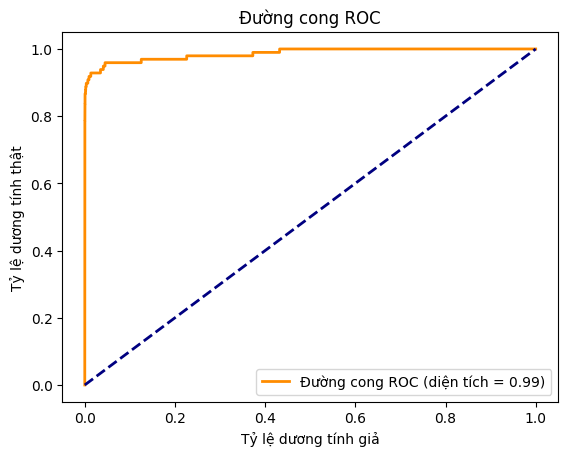

Diện tích dưới đường cong (AUC): 0.99
Ma trận nhầm lẫn:
[[56852    12]
 [   22    76]]

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Độ chính xác: 1.00


In [66]:
# Đánh giá mô hình
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model.eval()
# Lấy logits từ tập kiểm tra
logits = model(torch.tensor(X_test, dtype=torch.float32))
# Áp dụng hàm sigmoid để chuyển đổi logits thành xác suất
y_scores = torch.sigmoid(logits).detach().numpy()
# Chuyển đổi xác suất thành dự đoán nhị phân
y_pred = (y_scores > 0.5).astype(int)  # Chuyển đổi xác suất thành dự đoán nhị phân

# Tính toán đường cong ROC và AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Đường cong ROC (diện tích = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tỷ lệ dương tính giả')
plt.ylabel('Tỷ lệ dương tính thật')
plt.title('Đường cong ROC')
plt.legend(loc='lower right')
plt.show()

print(f"Diện tích dưới đường cong (AUC): {roc_auc:.2f}")

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("Ma trận nhầm lẫn:")
print(conf_matrix)

# Báo cáo phân loại
class_report = classification_report(y_test, y_pred)
print("\nBáo cáo phân loại:")
print(class_report)

# Độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác: {accuracy:.2f}")

### Codeblock 9: Đánh giá mô hình với ODIN

#### **Mục tiêu:**
- Đánh giá hiệu suất của mô hình trên tập kiểm tra bằng cách sử dụng các kỹ thuật ODIN.

#### **Quy trình:**
1. **Thêm nhiễu đầu vào:**
   - Sử dụng gradient để tạo nhiễu (input perturbation).
2. **Áp dụng nhiệt độ scaling:**
   - Điều chỉnh logits bằng siêu tham số nhiệt độ.
3. **Tính toán xác suất:**
   - Chuyển đổi logits thành xác suất dự đoán.
4. **Đánh giá hiệu suất:**
   - Tính các chỉ số như ROC, AUC, ma trận nhầm lẫn, và báo cáo phân loại.
   - Vẽ biểu đồ ROC để trực quan hóa hiệu suất.

#### **Kết quả:**
- Các chỉ số đánh giá hiệu suất của mô hình với kỹ thuật ODIN được tính toán và trực quan hóa.

#### **Điểm khác biệt chính:**
- **Mục tiêu:**
  - Codeblock 9 tập trung vào đánh giá mô hình với kỹ thuật ODIN.
- **Kỹ thuật sử dụng:**
  - Sử dụng input perturbation và temperature scaling.
- **Kết quả:**
  - Hiệu suất mô hình được đánh giá với các chỉ số và biểu đồ ROC.

### Tại sao sử dụng BCEWithLogitsLoss và không cần hàm sigmoid ở lớp cuối cùng?

#### **Giới thiệu về BCEWithLogitsLoss:**
`BCEWithLogitsLoss` là một hàm mất mát đặc biệt được thiết kế cho các bài toán phân loại nhị phân. Điểm nổi bật của hàm này là:

1. **Chuyển đổi logits thành xác suất:**
   - Tự động áp dụng hàm sigmoid để chuyển đổi đầu ra (logits) của mô hình thành xác suất.
2. **Tính toán Binary Cross-Entropy:**
   - Sử dụng xác suất đã chuyển đổi để tính toán hàm mất mát.

#### **Vì sao không cần hàm sigmoid ở lớp cuối cùng?**
- Trong mô hình `ODINModel`, lớp cuối cùng (`fc2`) không sử dụng hàm sigmoid. Điều này là do `BCEWithLogitsLoss` đã bao gồm bước áp dụng sigmoid nội bộ.
- Nếu thêm sigmoid vào lớp cuối cùng, sẽ dẫn đến việc áp dụng sigmoid hai lần, gây ra:
  - **Lỗi tính toán.**
  - **Giảm độ chính xác của mô hình.**

#### **Lợi ích của việc không sử dụng sigmoid ở lớp cuối cùng:**
1. **Ổn định số học:**
   - Việc tính toán sigmoid và cross-entropy trong một bước giúp giảm thiểu các vấn đề về số học (như tràn số hoặc mất mát độ chính xác).
2. **Hiệu suất tốt hơn:**
   - Tránh tính toán sigmoid thủ công giúp tăng hiệu suất và đơn giản hóa mô hình.

#### **Tóm lại:**
- Mô hình không sử dụng hàm sigmoid ở lớp cuối cùng vì `BCEWithLogitsLoss` đã xử lý bước này.
- Khi cần xác suất đầu ra (như trong đánh giá hoặc dự đoán), bạn có thể áp dụng hàm sigmoid thủ công lên logits.

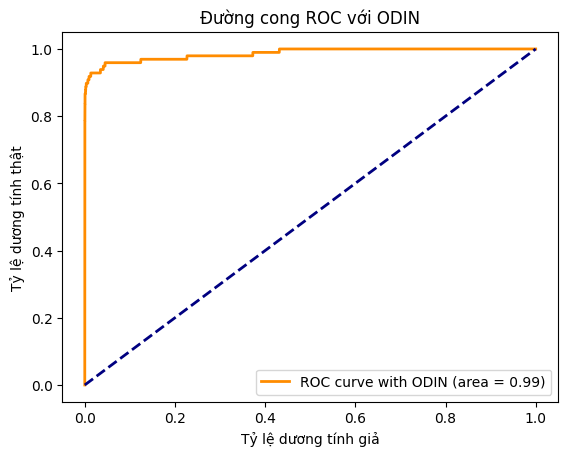

AUC with ODIN: 0.99
Ma trận nhầm lẫn với ODIN:
[[56852    12]
 [   22    76]]

Báo cáo phân loại với ODIN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Độ chính xác với ODIN: 1.00


In [67]:
# Các sửa đổi cụ thể cho phương pháp ODIN
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable

# Hàm áp dụng nhiệt độ scaling
def apply_temperature_scaling(logits, temperature):
    # Chia logits cho giá trị nhiệt độ để điều chỉnh
    return logits / temperature

# Hàm thêm nhiễu đầu vào
def add_input_perturbation(model, inputs, epsilon, temperature):
    # Đặt đầu vào thành biến có thể tính gradient
    inputs = Variable(inputs, requires_grad=True)
    # Tính toán logits từ mô hình
    logits = model(inputs)
    # Áp dụng nhiệt độ scaling cho logits
    scaled_logits = apply_temperature_scaling(logits, temperature)
    dummy_loss = torch.sum(logits)
    # Reset gradient của mô hình
    model.zero_grad()
    # Tính gradient của dummy loss đối với đầu vào
    dummy_loss.backward()
    gradient = inputs.grad.data
    # Thêm nhiễu vào đầu vào dựa trên dấu của gradient
    perturbed_inputs = inputs + epsilon * gradient.sign()
    return perturbed_inputs


# Đánh giá mô hình với các sửa đổi ODIN
temperature = 1000  # Siêu tham số cho nhiệt độ scaling
epsilon = 0.002  # Siêu tham số cho nhiễu đầu vào
model.eval()
# Thêm nhiễu vào tập kiểm tra
def add_input_perturbation_odin(model, inputs, epsilon):
    # Đặt đầu vào thành biến có thể tính gradient
    inputs = Variable(inputs, requires_grad=True)
    # Tính toán logits từ mô hình
    logits = model(inputs)
    dummy_loss = torch.sum(logits) # Tối đa hóa logit
    # Reset gradient của mô hình
    model.zero_grad()
    # Tính gradient của dummy loss đối với đầu vào
    dummy_loss.backward()
    gradient = inputs.grad.data
    # Thêm nhiễu vào đầu vào dựa trên dấu của gradient
    perturbed_inputs = inputs + epsilon * gradient.sign()
    return perturbed_inputs


# Đánh giá với ODIN
temperature = 1000  # Siêu tham số cho nhiệt độ scaling
epsilon = 0.002  # Siêu tham số cho nhiễu đầu vào

# Tính toán logits cho dữ liệu kiểm tra gốc
original_logits = model(torch.tensor(X_test, dtype=torch.float32))

# Thêm nhiễu vào dữ liệu kiểm tra gốc
perturbed_X_test_odin = add_input_perturbation_odin(model, torch.tensor(X_test, dtype=torch.float32), epsilon)

# Tính toán logits cho dữ liệu đã thêm nhiễu
perturbed_logits = model(perturbed_X_test_odin)

# Áp dụng nhiệt độ scaling cho logits của dữ liệu đã thêm nhiễu
scaled_perturbed_logits = apply_temperature_scaling(perturbed_logits, temperature)

# Chuyển đổi logits đã được scale thành xác suất (điểm ODIN)
odin_scores = torch.sigmoid(scaled_perturbed_logits).detach().numpy()

# Đối với các chỉ số đánh giá như ROC và AUC, chúng ta sử dụng điểm ODIN.
y_scores = odin_scores

# Chuyển đổi điểm ODIN thành dự đoán nhị phân (sử dụng ngưỡng, ví dụ: 0.5)
y_pred = (y_scores > 0.5).astype(int)

# Tính toán đường cong ROC và AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve with ODIN (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tỷ lệ dương tính giả')
plt.ylabel('Tỷ lệ dương tính thật')
plt.title('Đường cong ROC với ODIN')
plt.legend(loc='lower right')
plt.show()

print(f"AUC with ODIN: {roc_auc:.2f}")

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("Ma trận nhầm lẫn với ODIN:")
print(conf_matrix)

# Báo cáo phân loại
class_report = classification_report(y_test, y_pred)
print("\nBáo cáo phân loại với ODIN:")
print(class_report)

# Độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác với ODIN: {accuracy:.2f}")